In [1]:
import os
import matplotlib.pyplot as plt
import torch
os.chdir("..")
from src.cpwc.tools.ptychography import Ptychography as Ptychography
from src.cpwc.multires.class_multiressolver import *
from src.cpwc.multires.class_multires import *
from src.cpwc.tools.utils import *
torch.cuda.empty_cache()

# Set seeds 
torch.manual_seed(0)
np.random.seed(0)


/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def unwrap_2d(phase):
    """
    Unwraps a 2D phase array using NumPy's 1D unwrap function.
    
    Parameters:
    phase (numpy array): The 2D phase array to be unwrapped.
    
    Returns:
    unwrapped_phase (numpy array): The 2D unwrapped phase array.
    """
    # Unwrap along the first axis (rows)
    unwrapped_phase = np.unwrap(phase, axis=0)
    
    # Unwrap along the second axis (columns)
    unwrapped_phase = np.unwrap(unwrapped_phase, axis=1)
    
    return unwrapped_phase

In [3]:
max_scale = 7
max_probe_size = 32
max_shift = 8
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 20*np.array([0, 0, 0, 30, 30,40,80])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-1
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('test_data/peppers_reduced.jpg')/ 255 
image_tensor = torch.tensor(image).double().view(1, 1, 2**max_scale, 2**max_scale).to(torch.complex128)
x = torch.exp(1j * image_tensor).to(device)


In [4]:
y = linOperator.apply(x)

Scale: 7, n_copies: 1


In [5]:
import gc
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) and obj.is_cuda:
            print(type(obj), obj.size())
    except Exception:
        pass

<class 'torch.Tensor'> torch.Size([1, 289, 128, 128])
<class 'torch.Tensor'> torch.Size([1, 1, 128, 128])
<class 'torch.Tensor'> torch.Size([128, 128])
<class 'torch.Tensor'> torch.Size([128, 128])
<class 'torch.Tensor'> torch.Size([128, 128])


/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/torch/distributed/distributed_c10d.py:181: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(


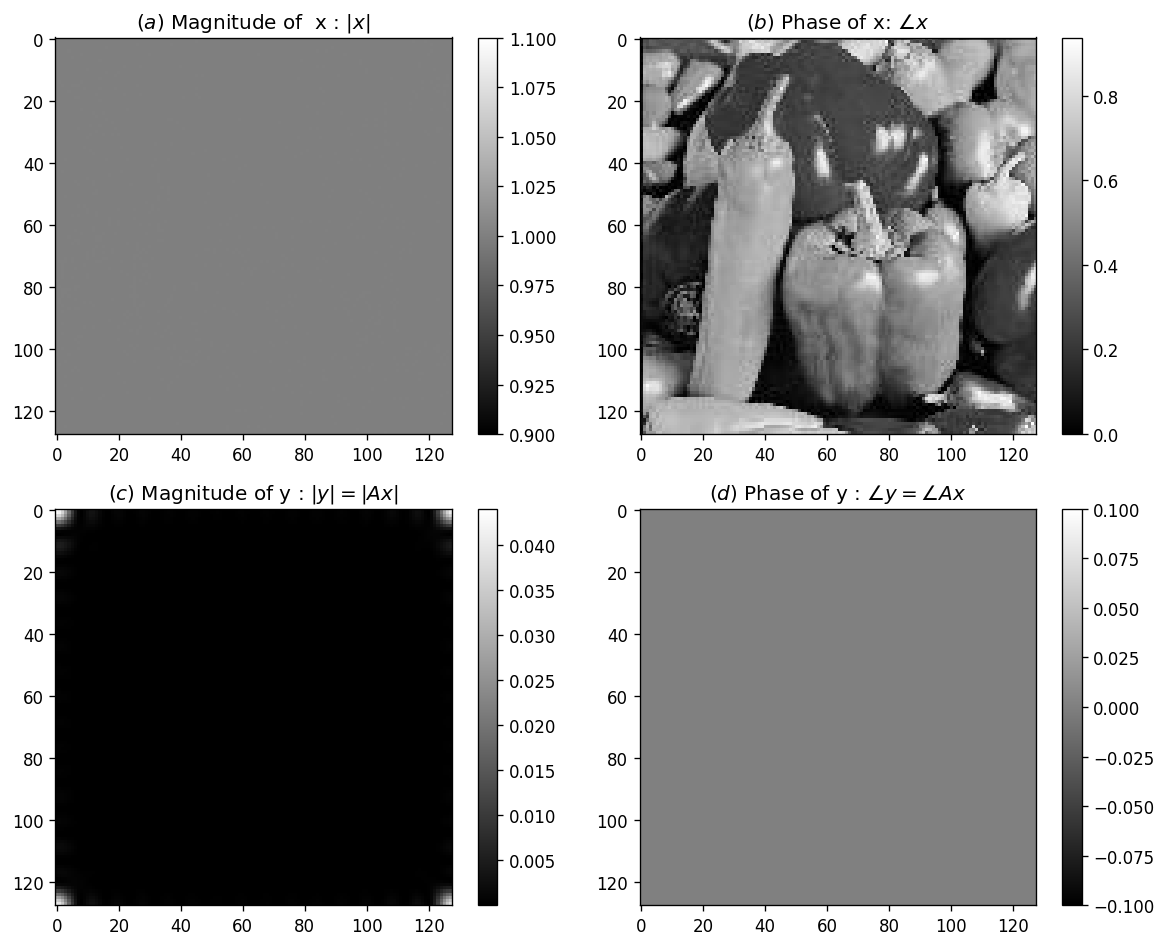

In [7]:
plt.figure(figsize=(10, 8),dpi = 120)    
plt.subplot(2, 2, 1)
plt.imshow(np.abs(x.cpu().numpy().squeeze()), cmap='gray')
plt.colorbar()
plt.title(r"$(a)$ Magnitude of  x : $|x|$")
plt.subplot(2, 2, 2)
plt.imshow(np.angle(x.cpu().numpy().squeeze()), cmap='gray')
plt.colorbar()
plt.title(r"$(b)$ Phase of x: $\angle x$")
plt.subplot(2, 2, 3)

plt.imshow(np.abs(y[:,0,:,:].cpu().numpy().squeeze()), cmap='gray')
plt.colorbar()
plt.title(r"$(c)$ Magnitude of y : $|y| = |Ax|$")
plt.subplot(2, 2, 4)
angy = np.angle(y[:,0,:,:].cpu().numpy().squeeze())
plt.imshow(angy, cmap='gray')
plt.colorbar()
plt.title(r"$(d)$ Phase of y : $\angle y = \angle Ax$")
plt.tight_layout()
plt.show()

In [8]:
y = linOperator.apply_linop(x)
x_recon = linOperator.apply_linopT(y)

In [9]:
y.shape

torch.Size([1, 289, 128, 128])

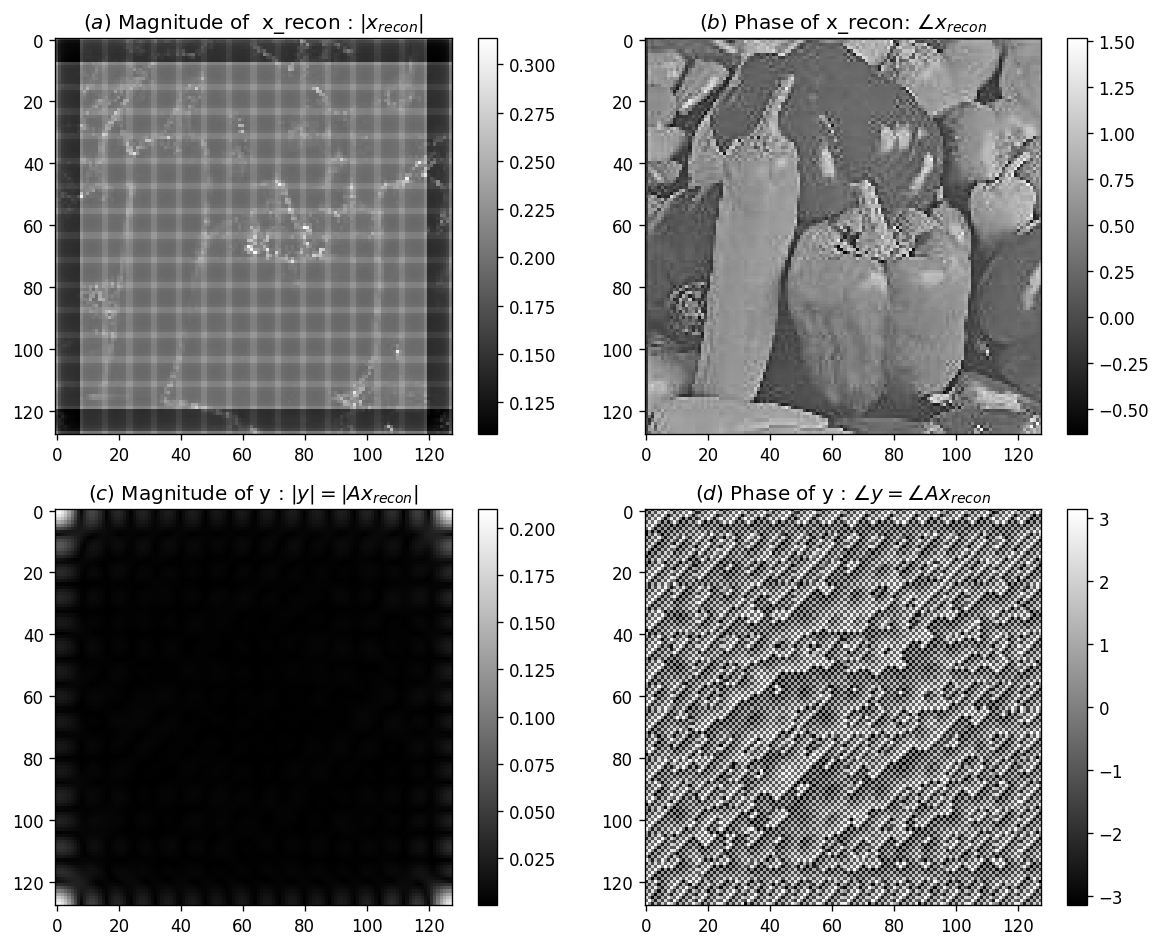

In [10]:
plt.figure(figsize=(10, 8),dpi = 120)
plt.subplot(2, 2, 1)
plt.imshow(np.abs(x_recon.cpu().numpy().squeeze()), cmap='gray')
plt.colorbar()
plt.title(r"$(a)$ Magnitude of  x_recon : $|x_{recon}|$")
plt.subplot(2, 2, 2)
a = np.angle(x_recon.cpu().numpy().squeeze())
plt.imshow(a, cmap='gray')
plt.colorbar()
plt.title(r"$(b)$ Phase of x_recon: $\angle x_{recon}$")
plt.subplot(2, 2, 3)
plt.imshow(np.abs(y[:,0,:,:].cpu().numpy().squeeze()), cmap='gray')
plt.colorbar()
plt.title(r"$(c)$ Magnitude of y : $|y| = |Ax_{recon}|$")
plt.subplot(2, 2, 4)
plt.imshow(np.angle(y[:,0,:,:].cpu().numpy().squeeze()), cmap='gray')
plt.colorbar()
plt.title(r"$(d)$ Phase of y : $\angle y = \angle Ax_{recon}$")
plt.tight_layout()


In [10]:
scale = 7
x = torch.randn(1, 1, 2**scale, 2**scale).to(torch.complex128).to(device)
y = torch.randn(1, 289, 2**scale, 2**scale).to(torch.complex128).to(device)

v1 = torch.sum(x.conj()*linOperator.apply_linopT(y))
v2 = torch.sum(y*linOperator.apply_linop(x).conj())

In [ ]:
v1

In [ ]:
v2

In [13]:
#The operator is proper

In [14]:
#Effect of upscaling 
M = MultiRes(7,"cuda")
scale = 5
x = torch.randn(1, 1, 2**scale, 2**scale).to(torch.complex128).to(device)
x_u = M.up(x)

In [ ]:
y_u = linOperator.apply_linop(x_u)
y = linOperator.apply_linop(x) 